## LETS GROW MORE

### Data Science Internship(LGM VIP-SEPT 2021)



## Task 1 : Iris Flowers Classification ML Project 

#### By - Vrushabh Rode

###  Importing Libraries and Datasets

In [2]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
header=["sepal length","sepal width","petal length","petal width","species"]
df = pd.read_csv('iris.data',header= None,names = header)
df

sepal length  sepal width  petal length  petal width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

### Basic EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [6]:
df.shape

(150, 5)

In [7]:
df.corr()

sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.109369      0.871754     0.817954
sepal width      -0.109369     1.000000     -0.420516    -0.356544
petal length      0.871754    -0.420516      1.000000     0.962757
petal width       0.817954    -0.356544      0.962757     1.000000

#### Checking the Null values

In [8]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [9]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Basic Visualization

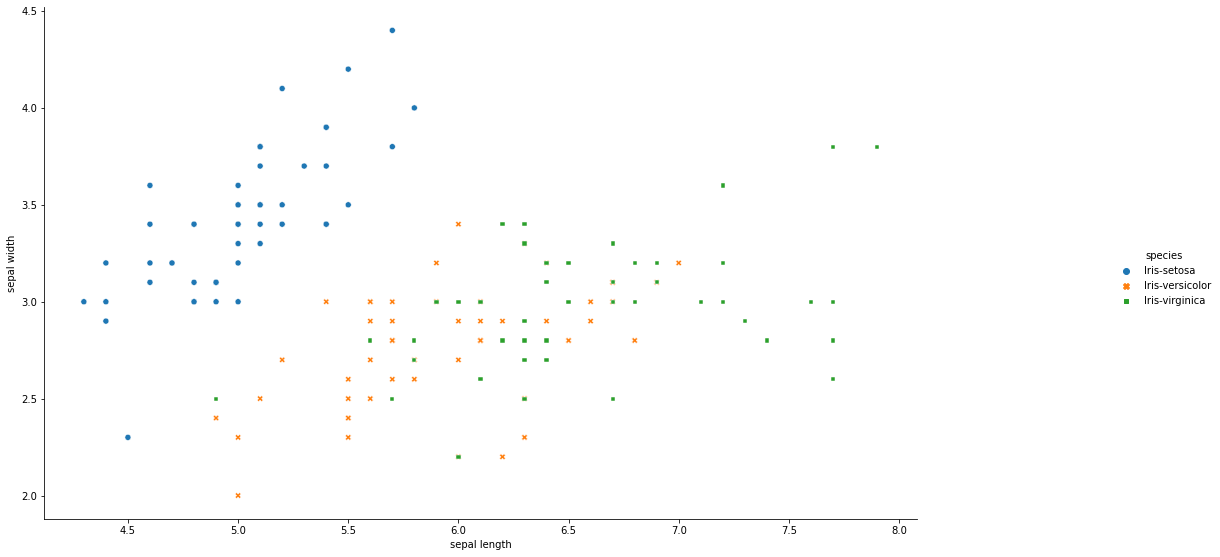

In [10]:
g=sns.relplot(x='sepal length',y='sepal width',data=df,hue='species',style='species')
g.fig.set_size_inches(18,8)
plt.show()

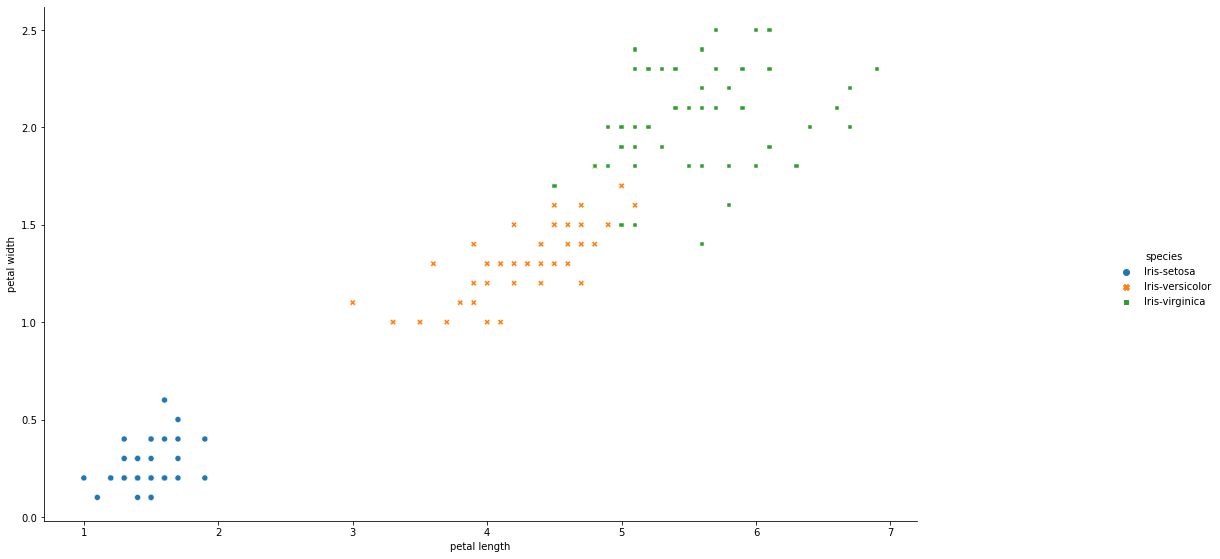

In [11]:
g=sns.relplot(x='petal length',y='petal width',data=df,hue='species',style='species')
g.fig.set_size_inches(18,8)
plt.show()

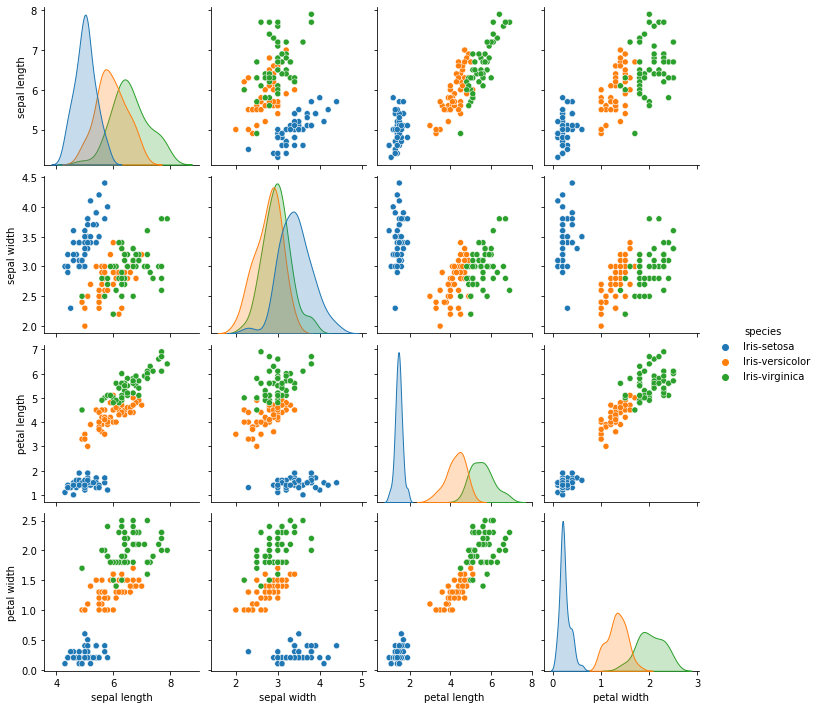

In [12]:
sns.pairplot(df,hue='species')
plt.show()

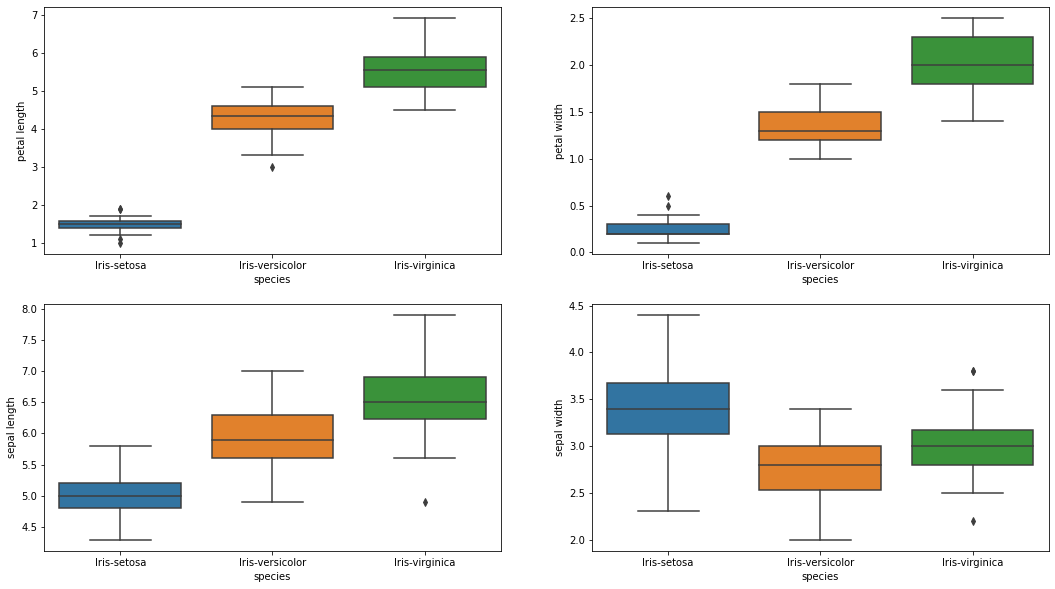

In [13]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='petal length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='petal width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal width',data=df)
plt.show()

### Preprocessing

In [14]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## MODEL BUILDING

### Naive Bayes Classifier

In [19]:
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
naive=clf.fit(X_train,Y_train)

In [20]:
y_pred=clf.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [26]:
from sklearn import metrics
Naive_Bayes = metrics.accuracy_score(Y_test,y_pred)*100
print("Accuracy by using Naive Bayes Classifier:",metrics.accuracy_score(Y_test,y_pred)*100)

Accuracy by using Naive Bayes Classifier: 96.66666666666667


### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
tree=clf2.fit(X_train,Y_train)

In [29]:
y_pred2=clf2.predict(X_test)
y_pred2

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [39]:
Decision_Tree_Classifier= metrics.accuracy_score(Y_test,y_pred2)*100
print("Accuracy by using Decision Tree Classifier:",metrics.accuracy_score(Y_test,y_pred2)*100)

Accuracy by using Decision Tree Classifier: 100.0


### Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(max_depth=4)
random=clf3.fit(X_train,Y_train)

In [33]:
y_pred3=clf3.predict(X_test)
y_pred3

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [40]:
Random_Forest_Classifier= metrics.accuracy_score(Y_test,y_pred3)*100
print("Accuracy by using Random_Forest_Classifier:",metrics.accuracy_score(Y_test,y_pred3)*100)

Accuracy by using Decision Tree Classifier: 100.0


### K-Nearest Neighbours

In [45]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )  
classifier.fit(X_train, Y_train)  

KNeighborsClassifier(n_neighbors=4)

In [46]:
y_pred4= classifier.predict(X_test)  
y_pred4

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [48]:
KNN= metrics.accuracy_score(Y_test,y_pred4)*100
print("Accuracy by using K-Nearest Neighbours:",metrics.accuracy_score(Y_test,y_pred4)*100)

Accuracy by using K-Nearest Neighbours: 100.0


### Support Vector Classifier

In [50]:
from sklearn.svm import SVC 
classifier1 = SVC(kernel='linear', random_state=0)  
classifier1.fit(X_train, Y_train)  

SVC(kernel='linear', random_state=0)

In [51]:
y_pred5= classifier1.predict(X_test)  
y_pred5

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [53]:
SVM= metrics.accuracy_score(Y_test,y_pred5)*100
print("Accuracy by using Supprt Vector Classifier:",metrics.accuracy_score(Y_test,y_pred5)*100)

Accuracy by using Supprt Vector Classifier: 100.0


### Conclusion
Thus we have SVM,KNN,Random forest and Decision tree Classifiers with Best Accuracy Score